<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.style as style 
import numpy
import pandas
import seaborn


In [3]:
seaborn.__version__

'0.10.1'

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [4]:
# dataset = pandas.read_csv(
#     'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv'
# )
# dataset.shape

import io
import requests
url='https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv'
s=requests.get(url).content
dataset=pandas.read_csv(io.StringIO(s.decode('utf-8')))

dataset.shape

(1620, 120)

In [5]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [6]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [7]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0,10,10,10,7.5,5.8,8.01,46,7.67,30,7.84,38
1,2017,DZA,Algeria,Middle East & North Africa,-,0,0,0,0,0,5.2,146,4.77,159,4.99,155
2,2017,AGO,Angola,Sub-Saharan Africa,10,0,0,0,5,5,5.98,121,4.83,158,5.4,151
3,2017,ARG,Argentina,Latin America & the Caribbean,10,10,10,10,10,10,8.04,41,5.67,147,6.86,77
4,2017,ARM,Armenia,Caucasus & Central Asia,7,10,10,10,7.5,8.2,7.15,72,7.7,27,7.42,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,-,10,10,10,10,10,9.29,7,8.18,6,8.73,4
1616,2008,DNK,Denmark,Western Europe,-,10,10,10,10,10,9.49,3,7.98,9,8.73,4
1617,2008,CHE,Switzerland,Western Europe,-,10,10,10,10,10,9.31,6,8.35,4,8.83,3
1618,2008,NZL,New Zealand,Oceania,-,10,10,10,10,10,9.42,4,8.46,3,8.94,2


Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [8]:
dataset.dtypes

year                                  int64
ISO_code                             object
countries                            object
region                               object
hf_score                             object
                                      ...  
ef_regulation_business_compliance    object
ef_regulation_business               object
ef_regulation                        object
ef_score                             object
ef_rank                              object
Length: 120, dtype: object

In [9]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
    dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


# Parte 1

Luego de las clases del primer fin de semana, ya tenemos las herramientas para responder las siguientes preguntas:

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [10]:
max_series = dataset[important_cols].max(numeric_only=True)
min_series = dataset[important_cols].min(numeric_only=True)
min_max_df = pandas.concat([max_series, min_series], axis=1, names=['max', 'min'])
min_max_df.columns = ['max', 'min']
min_max_df["range"] = min_max_df["max"] - min_max_df["min"]
min_max_df


,max,min,range
year,2017.00,2008.00,9.00
pf_identity_legal,10.00,0.00,10.00
pf_identity_sex_male,10.00,0.00,10.00
pf_identity_sex_female,10.00,0.00,10.00
pf_identity_sex,10.00,0.00,10.00
pf_identity_divorce,10.00,0.00,10.00
pf_identity,10.00,0.00,10.00
pf_score,9.56,2.22,7.34
pf_rank,162.00,1.00,161.00
ef_score,9.11,2.58,6.53


  2. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 

La manera adecuada dependerá de la información que querramos obtener de dicha comparativa. No es lo mismo, por ejemplo, el querer analizar los valores actuales de cada país que analizar la evolucion que tuvo cada uno a lo largo de los años. Tampoco sería prudente realizar una comparación directa entre un pais cuyo espacio muestral se extiende a lo largo de varios años que con uno que ingreso a este index en el último año. Por estas cuestiones es que para poder darnos una idea general de ambos promedio (o la mediana en el caso de que hayan habido cambios significativos durante dichos periodos). Si en cambio quisieramos destacar mas los cambios que fueron ocurriendo a lo largo del tiempo, nos convendría mas utilizar todos los valores de los cuales tenemos registro.


  3. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
  

In [11]:
col_sel = ["pf_identity", "hf_score"]
dataset_amer_car = dataset[dataset["region"] == "Latin America & the Caribbean"]
dict = {}
mundo = pandas.DataFrame(dict, index = ["Media", "Mediana", "Desviación Estandar"], columns = ["pf_identity", "hf_score"])
for col in col_sel:
    mean = dataset[col].mean()
    median = dataset[col].median()
    sd = dataset[col].std()
    mundo.loc["Media",col] = mean
    mundo.loc["Mediana",col] = median
    mundo.loc["Desviación Estandar",col] = sd

dict1 = {}
lat_caribe = pandas.DataFrame(dict, index = ["Media", "Mediana", "Desviación Estandar"], columns = ["pf_identity", "hf_score"])
for col in col_sel:
    mean1 = dataset_amer_car[col].mean()
    median1 = dataset_amer_car[col].median()
    sd1 = dataset_amer_car[col].std()
    lat_caribe.loc["Media",col] = mean1
    lat_caribe.loc["Mediana",col] = median1
    lat_caribe.loc["Desviación Estandar",col] = sd1
    
compara = pandas.concat([mundo, lat_caribe], axis=0, keys=["Mundo", 'América Latina y el Caribe'])
compara


pf_identity  hf_score
Mundo                      Media                   7.28065   6.97821
                           Mediana                     8.8       6.9
                           Desviación Estandar     3.18158   1.05624
América Latina y el Caribe Media                   8.58217   7.03698
                           Mediana                      10      7.02
                           Desviación Estandar     1.87583  0.634897

  4. ¿Tiene sentido calcular la moda?

Si bien se podría calcular la moda facilmente y nos daría un resultado matemático "valido", analíticamente no nos aporta ningún valor ya que en variables cuantitativas continuas suelen presentar baja o nula repetición de valores. Una alternativa aplicable es definir intervalos sobre la variable y calcular la moda sobre los intervalos en vez de los valores en sí mismos.


  5. ¿Cómo pueden sanearse los valores faltantes?

Dependiendo del tipo de analisis que necesitemos llevar a cabo podemos aplicar distintas alternativas. Algunas de ellas pueden ser, por ejemplo, eliminar las filas donde hayan huecos en el dataset o eliminar las columnas dependiendo de como nos afecten en nuestros calculos. Una tercera opción es, teniendo en cuenta la cantidad de datos faltantes, rellenar esos espacios vacios con valores creados en base a los valores de los cuales si disponemos. Obviamente la opcion que se elija debe ser debidamente justificada en base a las observaciones que se quieren realizar sobre la información



  6. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

Existen ciertos registros que pueden ser considerados como "outliers" al estar lo suficientemente alejados de la media de la variable. De todas formas, primero debe analizarse si estos valores represetan información significativa dentro de nuestro análisis o si corresponden a algún tipo de error durante el muestreo.

Para poder detectarlos, un método sencillo y eficaz es utilizar un diagrama de cajas. Dentro del mismo podremos visualizar facilmente tanto los rangos de los cuartiles, como los valores extremos (inferiores y superiores).

A continuación, generaremos los diagramas de cajas para la variable "pf_identity", primero de manera global y luego clasificados por region. Dentro de este último podemos ver que se desprenden los puntos atípicos, sin embargo al considerar todas las regiones como una unidad quedan incluidos dentro del "bigote" (es decir, son outliers por grupo).


Text(0, 0.5, '')

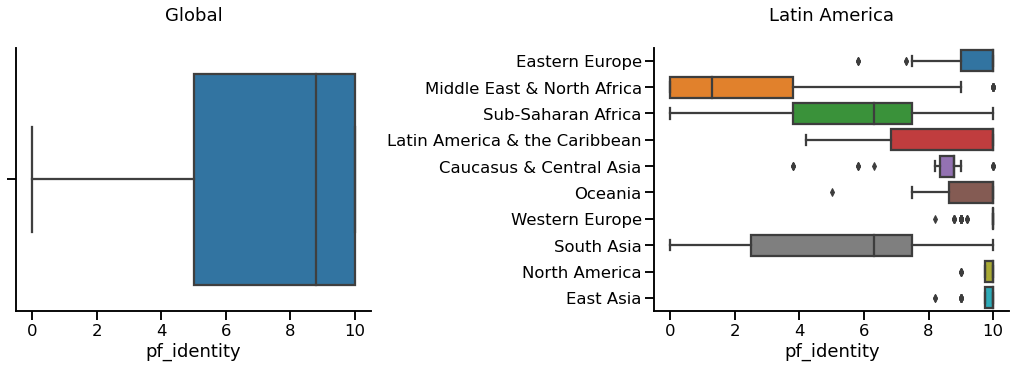

In [12]:

seaborn.set_context(context='talk', font_scale=1)
fig, axs = plt.subplots(nrows=1, ncols=2,
                        figsize=(7*2, 5), constrained_layout=True)
axs[0].set_title("Global\n")
axs[1].set_title("Latin America\n")
seaborn.boxplot(data=dataset,  x='pf_identity', ax=axs[0])
seaborn.boxplot(data=dataset, y='region', x='pf_identity', ax=axs[1])
seaborn.despine()   
plt.ylabel("")

Al analizar nuestra segunda variable, notamos que el comportamiento no es el mismo. En este caso, los outliers quedan aparentes independientemente de si se utiliza la subclasificación o no, por lo que concluimos que son outliers globales.


Text(0, 0.5, '')

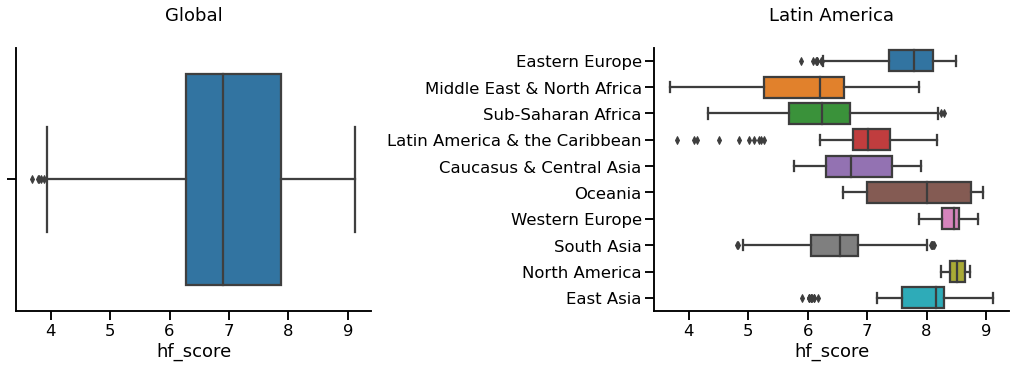

In [13]:

seaborn.set_context(context='talk', font_scale=1)
fig, axs = plt.subplots(nrows=1, ncols=2,
                        figsize=(7*2, 5), constrained_layout=True)
axs[0].set_title("Global\n")
axs[1].set_title("Latin America\n")
seaborn.boxplot(data=dataset,  x='hf_score', ax=axs[0])
seaborn.boxplot(data=dataset, y='region', x='hf_score', ax=axs[1])
seaborn.despine()   
plt.ylabel("")

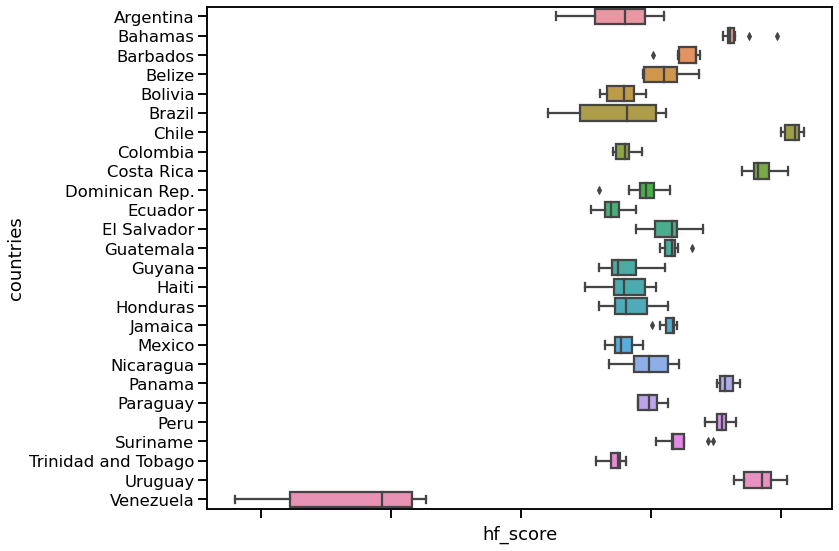

In [14]:
plt.figure(figsize=(12,8))
latam = dataset['Latin America & the Caribbean' == dataset['region']]
ax = seaborn.boxplot(x='hf_score', y='countries', data=latam)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

En estos casos particulares, entendemos que es necesario no eliminar los outliers al momento de realizar nuestros análisis ya que pueden representar, por ejemplo, las distintas realidades que se viven de país a país. En este último gráfico especificamente, podemos ver un rango más amplio de valores en Latino América y el Caribe para los valores de la variable "hf_score" lo cual se corresponde con la disparidad existente entre los distintos paises que conforman una región tan extensa. Consideramos que la variedad en los valores (desde menores a 4 hasta mayores a 9) asi como la distribución de los mismos nos aporta información importante respecto al grupo y las métricas que se quieren estudiar. Deberíamos ser muy cuidadosos al eliminar outliers dado a que pueden contener información importante. Por ejemplo, en Latinoamérica todos los valores de Venezuela pueden ser considerados outliers.


## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.

In [15]:
def plt_mean(dt, region):
    plt.figure(figsize=(20,10))
    pf_identity_graph = seaborn.lineplot(
        y='pf_identity', x='year',
        data=dt,
        estimator=numpy.mean,
        label='pf_identity',
        ci = None
    )
    hf_score_graph = seaborn.lineplot(
        y='hf_score', x='year',
        data=dt,
        estimator=numpy.mean,
        label='hf_score',
        ci = None
    )
    hf_score_graph.set(ylabel='Mean', xlabel='Year')
    hf_score_graph.set_title(region)
    plt.show()
    

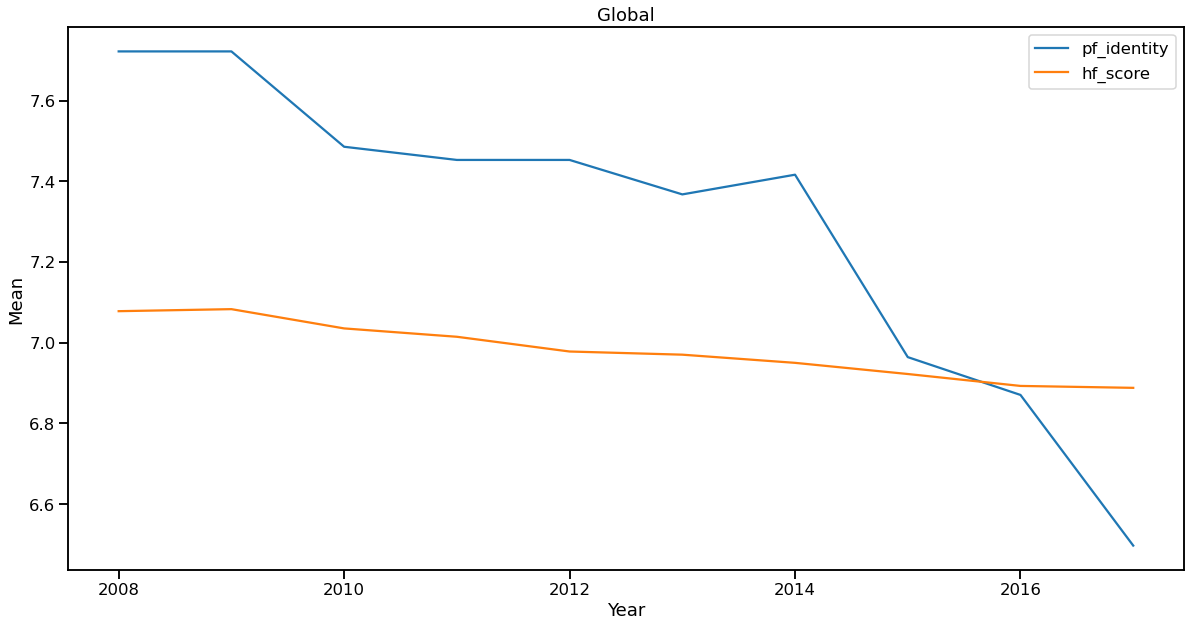

In [16]:
plt_mean(dataset, 'Global')


2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

<Figure size 1440x720 with 0 Axes>

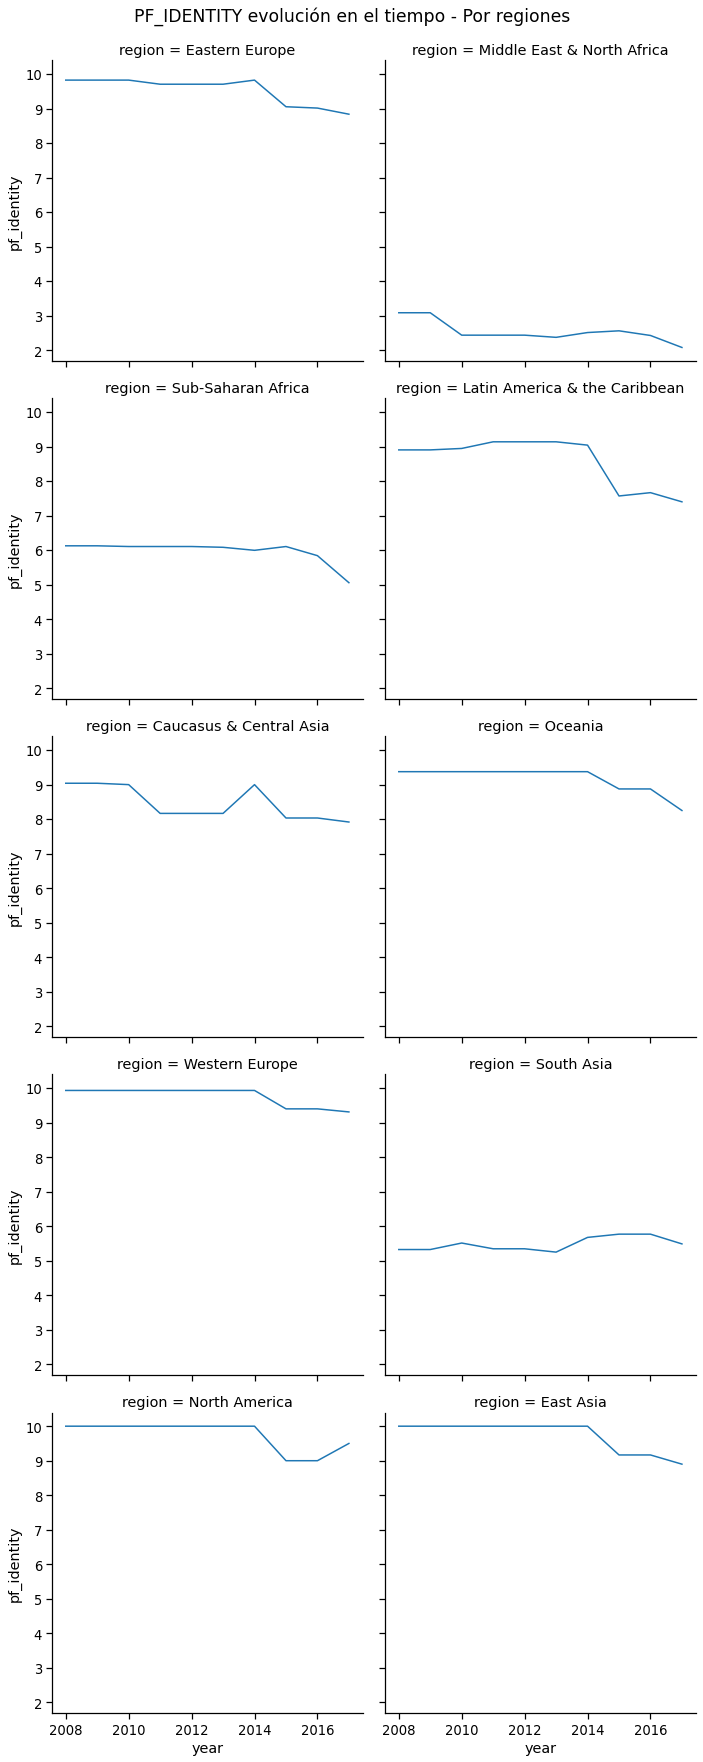

In [17]:
plt.figure(figsize=(20,10))
seaborn.set_context(context='notebook', font_scale=1.2)
ax = seaborn.relplot(x="year", y="pf_identity", col="region", col_wrap=2, estimator="mean",
                 data=dataset, kind="line", ci=None)

plt.subplots_adjust(top=0.95)
ax.fig.suptitle('PF_IDENTITY evolución en el tiempo - Por regiones')
plt.show()

<Figure size 1440x720 with 0 Axes>

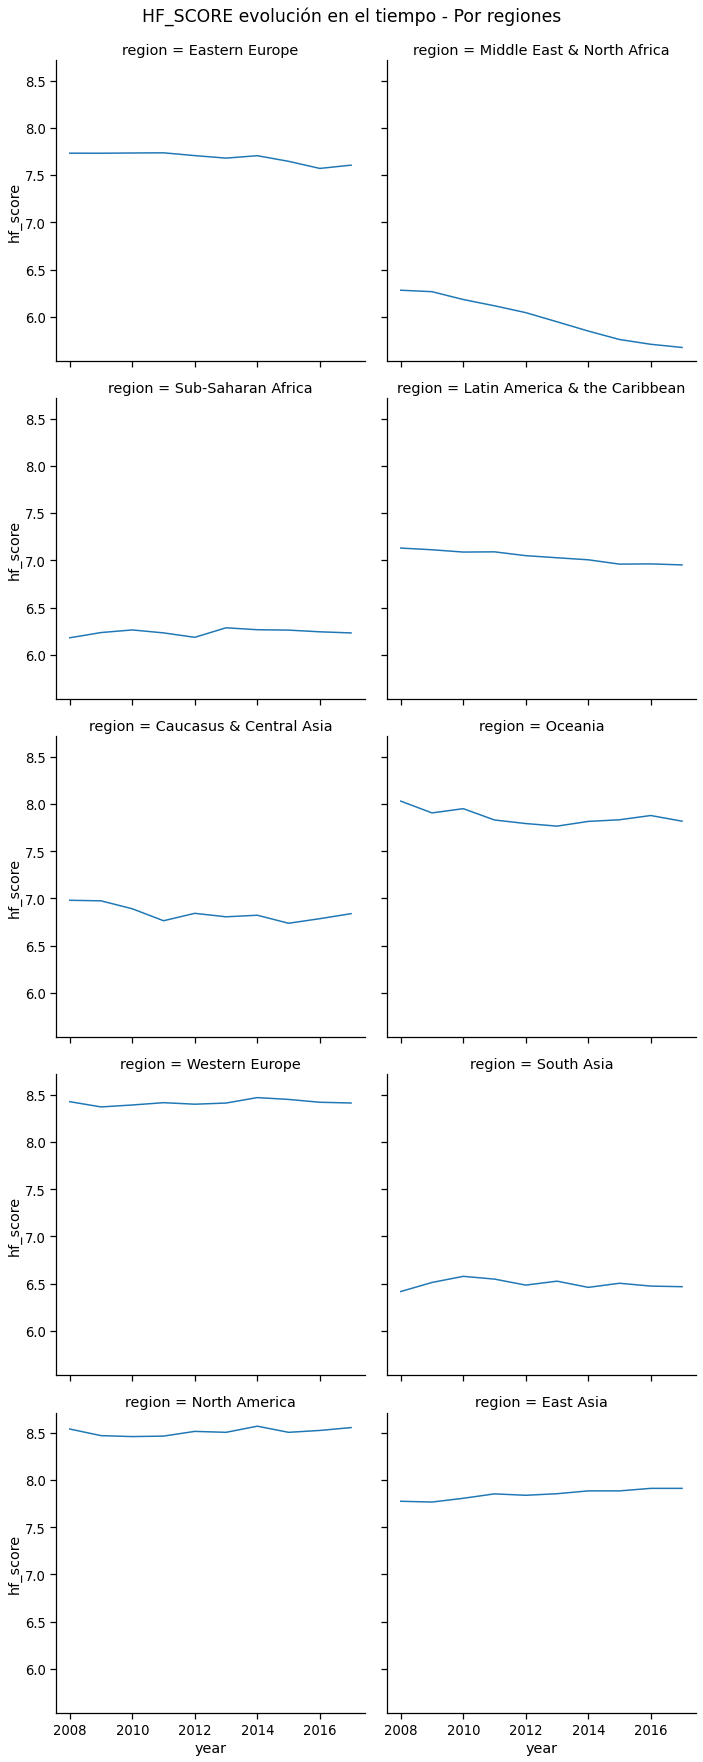

In [18]:
plt.figure(figsize=(20,10))
seaborn.set_context(context='notebook', font_scale=1.2)
ax = seaborn.relplot(x="year", y="hf_score", col="region", col_wrap=2, estimator="mean",
                 data=dataset, kind="line", ci=None)

plt.subplots_adjust(top=0.95)
ax.fig.suptitle('HF_SCORE evolución en el tiempo - Por regiones')
plt.show()

Como podemos ver la libertad de identidad personal (pf_identity) sufre un declive en el año 2014 globalmente a mayor o menor escala. Por otra parte hf_score, a pesar de no tener saltos abruptos en ninguna región no tiene una tendencia mundial.


3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

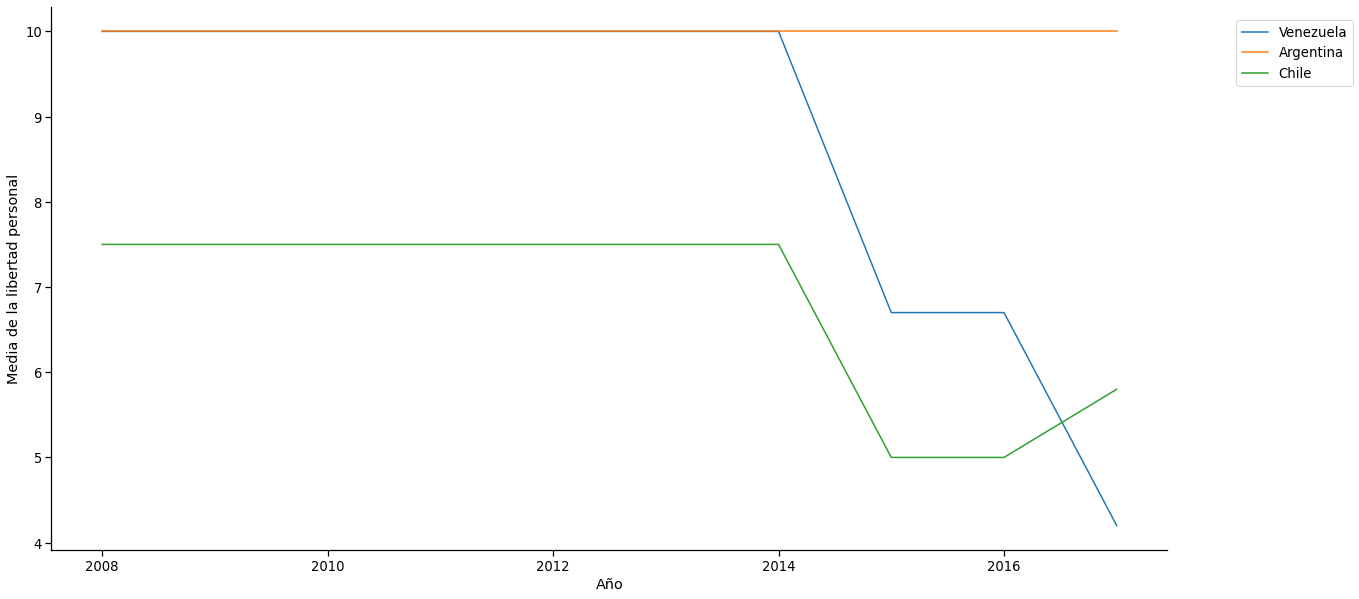

In [19]:
plt.figure(figsize=(20,10))
countries=dataset['Venezuela' == dataset['countries']]
seaborn.lineplot(data=countries, x='year', y='pf_identity', label='Venezuela')
countries=dataset['Argentina' == dataset['countries']]
seaborn.lineplot(data=countries, x='year', y='pf_identity', label='Argentina')
countries=dataset['Chile' == dataset['countries']]
seaborn.lineplot(data=countries, x='year', y='pf_identity', label='Chile')
plt.xlabel('Año')
plt.ylabel('Media de la libertad personal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)
seaborn.despine()

La mayoria de paises en latinoamerica tienen una media de la variable pf_identity igual a 10 (como Argentina en el grafico de arriba) lo cual explica la tendencia de la region por año con pendiente descendiente muy suave. Algunos paises outliers como Venezuela o Chile bajan la media de la region al tener medias mas bajas que 5 puntos de pf_identity.

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

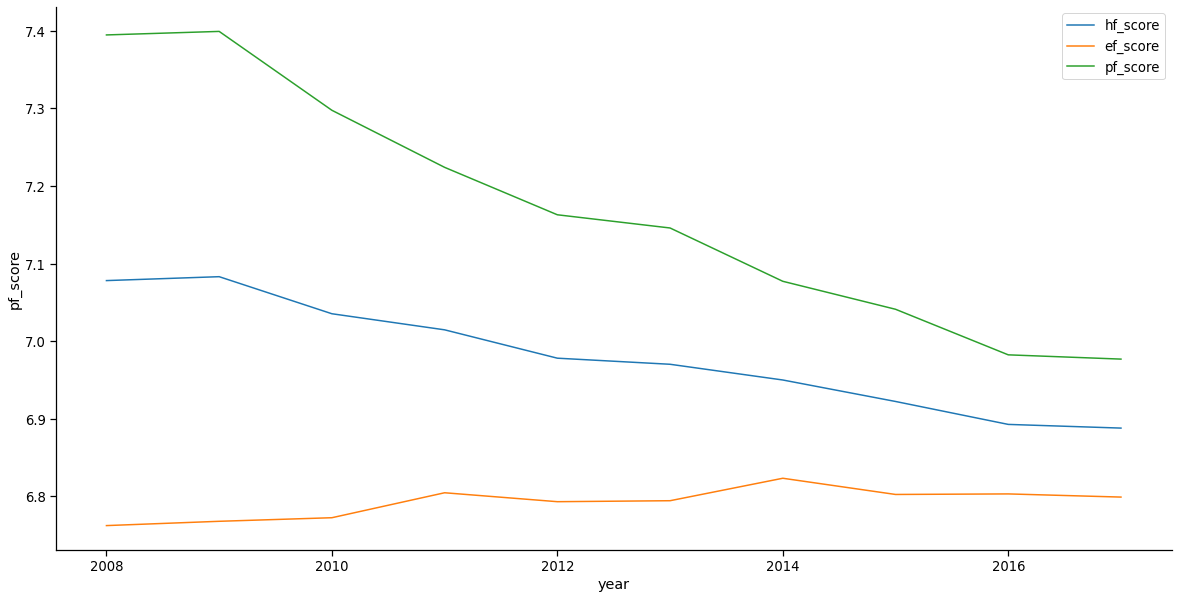

In [20]:
plt.figure(figsize=(20,10))
seaborn.lineplot(data=dataset, x='year', y='hf_score', label='hf_score', ci = None)
seaborn.lineplot(data=dataset, x='year', y='ef_score', label='ef_score', ci = None)
seaborn.lineplot(data=dataset, x='year', y='pf_score', label='pf_score', ci = None)
seaborn.despine()

La tendencia de la variable pf_score pareceria ir disminuyendo con los años mientras que la variable ef_score se mantiene casi constante con un pequeño aumento. La variable hf_score es el promedio de las dos anteriores por lo que tiene una tendencia intermedia.

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


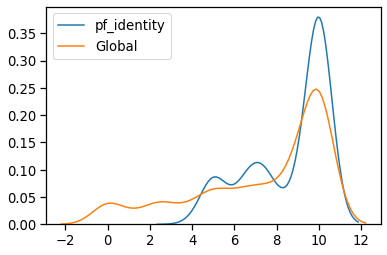

In [21]:
seaborn.kdeplot(
    dataset['Latin America & the Caribbean' == dataset['region']]['pf_identity']
)
seaborn.kdeplot(dataset['pf_identity'], label="Global")

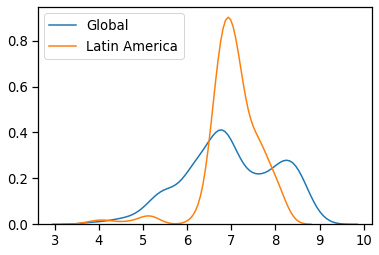

In [22]:
seaborn.kdeplot(dataset['hf_score'], label="Global");
seaborn.kdeplot(dataset['Latin America & the Caribbean' == dataset['region']]['hf_score'], label="Latin America")

Los graficos previos nos brindan una visión quizás demasiado general de los datos. Juntando todos los años y paises las distribuciónes no van a poder brindar información verdaderamente descriptiva de cada pais. En el caso de la variable `pf_identity` global y en Latinoamérica visualmente asemeja a una distribucion beta con sesgo alrededor de 8, mientras que la variable `hf_score` en Latinoamérica se parece a una distribución normal y globalmente asemeja visualmente a una distribucion bimodal.

Podemos ver en el siguiente gráfico como el `hf_score` de Perú, Argentina y Venezuela lo diferentes que son. Los datos de Latinoamérica no son lo suficientemente homogéneos como para tomarlos como un conjunto.


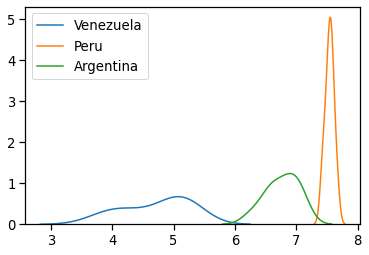

In [23]:
seaborn.kdeplot(
    dataset['Venezuela' == dataset['countries']]['hf_score'],
    label="Venezuela"
)
seaborn.kdeplot(
    dataset['Peru' == dataset['countries']]['hf_score'],
    label="Peru"
)
seaborn.kdeplot(
    dataset['Argentina' == dataset['countries']]['hf_score'],
    label="Argentina"
)

También podemos ver los cambios que hay año a año en algunos paises. Sumar al conjunto de datos todos los años y paises sería poner en el mismo foco a regiones con trayectorias distintas.

Por ejemplo, podemos ver como el valor de hf_score de Noruega se mantiene al rededor de ~8.5 pero por otra parte en Syria en 2011 tenia un valor de ~5.5 y luego en 2013 baja hasta ~3.8


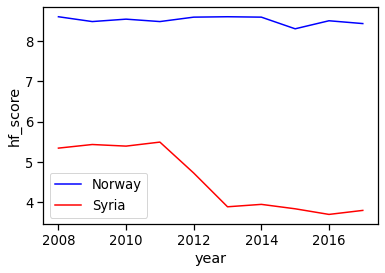

In [24]:
syria_dt = dataset['Syria' == dataset['countries']]
norway_dt = dataset['Norway' == dataset['countries']]

seaborn.lineplot(x="year", y="hf_score", data=norway_dt, color="blue", label = 'Norway' )
seaborn.lineplot(x="year", y="hf_score", data=syria_dt, color="red", label = 'Syria')

## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

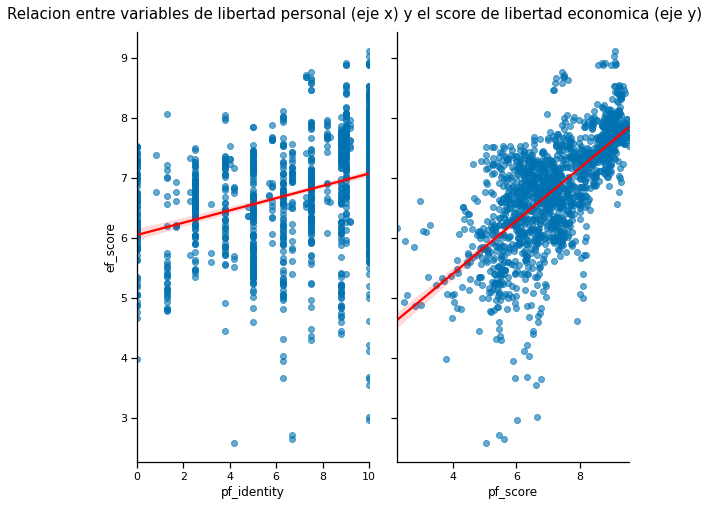

In [25]:
#Estilo del gráfico
seaborn.set_context("notebook")
style.use("seaborn-colorblind")

#Grafico
g = seaborn.pairplot(data=dataset, x_vars=["pf_identity", "pf_score"], y_vars="ef_score", kind="reg",  plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.6}})
g.fig.set_size_inches(8,8)

#Titulo y print
plt.subplots_adjust(top=0.95)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Relacion entre variables de libertad personal (eje x) y el score de libertad economica (eje y)', fontsize=15, va="center")
plt.show()

## Conclusiones

Se observa una corelacion lineal y positiva entre el score de libertades economicas y el score de libertades personales. Se concluye que un aumento de las libertades económicas refiere a un aumento en las libertaes personales.
Se observa, también, una pendiente bastante marcada, lo que indica una correlacion "fuerte"
No hay correlación entre las libertades personales referidas a la identidad y las libertades economicas. 
Lo anterior nos da la idea de que pueden coexistir un alto grado de libertad económica sin libertad en cuando a identidades personales y viceversa.

2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.

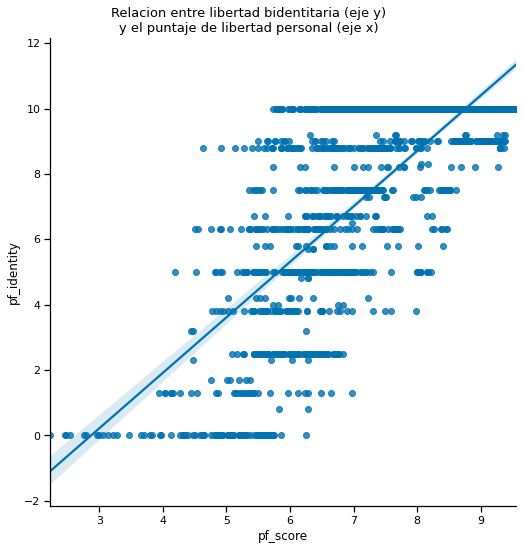

In [26]:
#Grafico 1
g = seaborn.lmplot(data=dataset, x="pf_score", y="pf_identity")
g.fig.set_size_inches(8,8)

#Titulo y print
plt.subplots_adjust(top=0.95)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle("Relacion entre libertad bidentitaria (eje y)"  +"\n" + "y el puntaje de libertad personal (eje x)", fontsize=13, va="center")
plt.show()

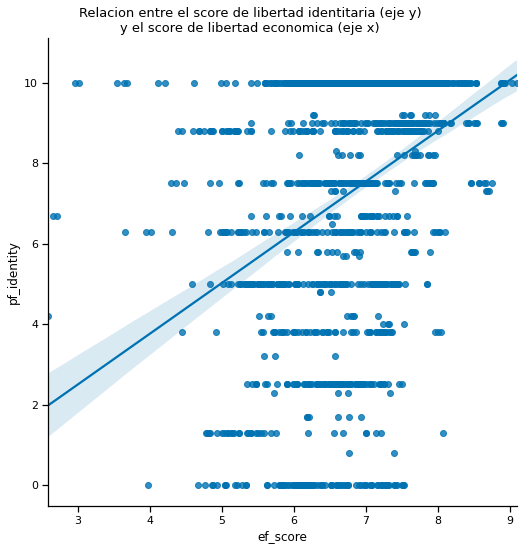

In [27]:
#Grafico 2
g = seaborn.lmplot(data=dataset, x="ef_score", y="pf_identity")
g.fig.set_size_inches(8,8)

#Titulo y print
plt.subplots_adjust(top=0.95)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle("Relacion entre el score de libertad identitaria (eje y)" +"\n" +"y el score de libertad economica (eje x)", fontsize=13, va="center")
plt.show()

## Conclusiones

Se observa una correlacion entre el score de libertad personal y las libertades identitarias. Si bien existe una marcada disperción de los datos y se puede observar una correlación lineal y positiva.
Lo anterior nos indica que las libertades personales estan ligadas a las libertades identitarias.
Nuevamente, no se observa relación entre las libertades personales (en este caso identitarias) y las libertades económicas -segundo gráfico-.

3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.

Procedemos a repasar rapidamente la informacion estadistica de las variables de interes para entender las proporciones de los cuartiles y poder decidir que limites de intervalos considerar al momento de convertir las variables a categoricas:

In [28]:
pf_identity_LA = dataset[dataset.region == 'Latin America & the Caribbean'].pf_identity.describe()  
pf_identity_mundo = dataset.pf_identity.describe()  
hf_score_LA = dataset[dataset.region == 'Latin America & the Caribbean'].pf_identity.describe()  
hf_score_mundo = dataset.pf_identity.describe()  

compara1 = pandas.concat([pf_identity_mundo, pf_identity_LA], axis=1,keys=["Mundo", 'América Latina y el Caribe'], names = "pf_identity")
compara2 = pandas.concat([hf_score_mundo, hf_score_LA], axis=1,keys=["Mundo", 'América Latina y el Caribe'], names = "hf_score")
display(compara1,compara2)

pf_identity,Mundo,América Latina y el Caribe
count,1540.000000,258.000000
mean,7.280649,8.582171
std,3.181577,1.875832
min,0.000000,4.200000
25%,5.000000,6.850000
50%,8.800000,10.000000
75%,10.000000,10.000000
max,10.000000,10.000000


hf_score,Mundo,América Latina y el Caribe
count,1540.000000,258.000000
mean,7.280649,8.582171
std,3.181577,1.875832
min,0.000000,4.200000
25%,5.000000,6.850000
50%,8.800000,10.000000
75%,10.000000,10.000000
max,10.000000,10.000000


Consecuentemente, pasamos a crear las variables categoricas creando intervalos considerando los datos estadisticos obtenidos para obtener una densidad de puntos coherente entre los intervalos.

In [29]:
#Variable pf_identity
PFI_mundo = dataset.pf_identity[~dataset.pf_identity.isnull()]
i1 = PFI_mundo.min()
i2 = PFI_mundo.mean() - 0.25 * PFI_mundo.std()
i3 = PFI_mundo.mean() + 0.85 * PFI_mundo.std()
i4 = PFI_mundo.max()
intervals = [i1 , i2, i3, i4]
PFI_mundo_segment = pandas.cut(PFI_mundo, bins = intervals, labels = ["low", "medium", "high"])
exp1 = pandas.crosstab(PFI_mundo, PFI_mundo_segment)
print('\npf_identity Categorica Global\n')
display(exp1)
PFI_LA = dataset[dataset.region == 'Latin America & the Caribbean'].pf_identity
PFI_LA = PFI_LA[~PFI_LA.isnull()]
i1 = PFI_LA.min()
i2 = PFI_LA.mean() - 0.75 * PFI_LA.std()
i3 = PFI_LA.mean() + 0.75 * PFI_LA.std()
i4 = PFI_LA.max()
intervals = [i1 , i2, i3, i4]
PFI_LA_segment = pandas.cut(PFI_LA, bins = intervals, labels = ["low", "medium", "high"])
exp2 = pandas.crosstab(PFI_LA, PFI_LA_segment)
print('\npf_identity Categorica Latino America y el Caribe\n')
display(exp2)


pf_identity Categorica Global



pf_identity,low,medium,high
pf_identity,,,
low,435,0,0
medium,0,387,0
high,0,0,618



pf_identity Categorica Latino America y el Caribe



pf_identity,low,medium,high
pf_identity,,,
low,63,0,0
medium,0,45,0
high,0,0,148


In [30]:
#Variable ef_score
EFS_mundo = dataset.ef_score[~dataset.ef_score.isnull()]
i1 = EFS_mundo.min()
i2 = EFS_mundo.mean() - 0.5 * EFS_mundo.std()
i3 = EFS_mundo.mean() + 0.5 * EFS_mundo.std()
i4 = EFS_mundo.max()
intervals = [i1 , i2, i3, i4]
EFS_mundo_segment = pandas.cut(EFS_mundo, bins = intervals, labels = ["low", "medium", "high"])
exp3 = pandas.crosstab(EFS_mundo, EFS_mundo_segment)
print('\nef_score Categorica Global\n')
display(exp3)
EFS_LA = dataset[dataset.region == 'Latin America & the Caribbean'].ef_score
EFS_LA = EFS_LA[~EFS_LA.isnull()]
i1 = EFS_LA.min()
i2 = EFS_LA.mean() - 0.1 * EFS_LA.std()
i3 = EFS_LA.mean() + 0.5 * EFS_LA.std()
i4 = EFS_LA.max()
intervals = [i1 , i2, i3, i4]
EFS_LA_segment = pandas.cut(EFS_LA, bins = intervals, labels = ["low", "medium", "high"])
exp4 = pandas.crosstab(EFS_LA, EFS_LA_segment)
print('\npf_identity Categorica Latino America y el Caribe\n')
display(exp4)


ef_score Categorica Global



ef_score,low,medium,high
ef_score,,,
low,448,0,0
medium,0,552,0
high,0,0,539



pf_identity Categorica Latino America y el Caribe



ef_score,low,medium,high
ef_score,,,
low,83,0,0
medium,0,94,0
high,0,0,80


In [31]:
#Variable pf_score
PFS_mundo = dataset.pf_score[~dataset.pf_score.isnull()]
i1 = PFS_mundo.min()
i2 = PFS_mundo.mean() - 0.5 * PFS_mundo.std()
i3 = PFS_mundo.mean() + 0.5 * PFS_mundo.std()
i4 = PFS_mundo.max()
intervals = [i1 , i2, i3, i4]
PFS_mundo_segment = pandas.cut(PFS_mundo, bins = intervals, labels = ["low", "medium", "high"])
exp5 = pandas.crosstab(PFS_mundo, PFS_mundo_segment)
print('\npf_score Categorica Global\n')
display(exp5)
PFS_LA = dataset[dataset.region == 'Latin America & the Caribbean'].pf_score
PFS_LA = PFS_LA[~PFS_LA.isnull()]
i1 = PFS_LA.min()
i2 = PFS_LA.mean() - 0.5 * PFS_LA.std()
i3 = PFS_LA.mean() + 0.5 * PFS_LA.std()
i4 = PFS_LA.max()
intervals = [i1 , i2, i3, i4]
PFS_LA_segment = pandas.cut(PFS_LA, bins = intervals, labels = ["low", "medium", "high"])
exp6 = pandas.crosstab(PFS_LA, PFS_LA_segment)
print('\npf_score Categorica Latino America y el Caribe\n')
display(exp6)


pf_score Categorica Global



pf_score,low,medium,high
pf_score,,,
low,501,0,0
medium,0,528,0
high,0,0,510



pf_score Categorica Latino America y el Caribe



pf_score,low,medium,high
pf_score,,,
low,87,0,0
medium,0,92,0
high,0,0,78


4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.

pf_identity,low,medium,high
ef_score,,,
low,192,96,102
medium,183,132,207
high,59,159,309


Text(0.5, 1.0, 'Correlacion entre las variables categoricas \n de libertad economica y de identidad globales\n')

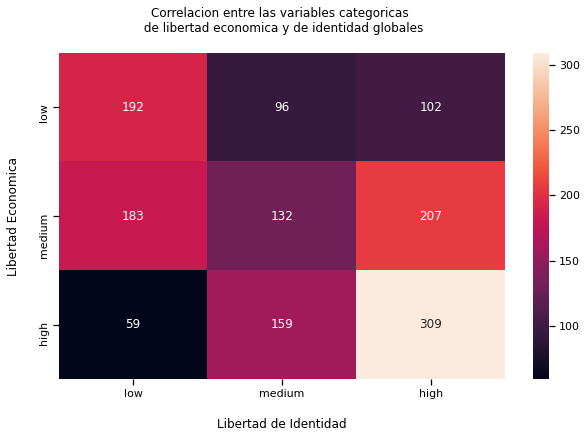

In [32]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(EFS_mundo_segment, PFI_mundo_segment)
display(exp)
seaborn.heatmap(exp, annot=True, fmt = 'd')
plt.ylabel('Libertad Economica\n')
plt.xlabel('\nLibertad de Identidad')
plt.title('Correlacion entre las variables categoricas \n de libertad economica y de identidad globales\n')

pf_identity,low,medium,high
ef_score,,,
low,24,6,53
medium,24,12,57
high,15,27,38


Text(0.5, 1.0, 'Correlacion entre las variables categoricas \n de libertad economica y de identidad de\n Latino America y el Caribe\n')

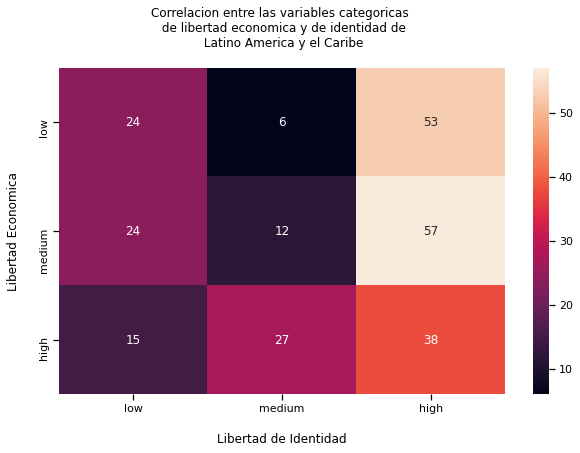

In [33]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(EFS_LA_segment, PFI_LA_segment)
display(exp)
seaborn.heatmap(exp, annot=True)
plt.ylabel('Libertad Economica\n')
plt.xlabel('\nLibertad de Identidad')
plt.title('Correlacion entre las variables categoricas \n de libertad economica y de identidad de\n Latino America y el Caribe\n')

En los graficos de arriba, podemos ver cualitativamente la correlacion entre las variables de libertad de identidad y de libertad economica. No habria una relacion aparente ya que los datos estan concentrados en el invarvalo alto de libertad de identidad aun contando con valores de libertad economica bajos

pf_identity,low,medium,high
pf_score,,,
low,294,70,38
medium,121,197,210
high,20,120,370


Text(0.5, 1.0, 'Correlacion entre las variables categoricas \n de libertad personal y de identidad globales\n')

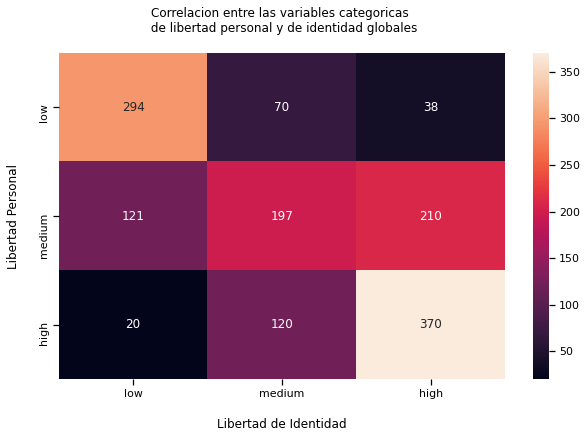

In [34]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(PFS_mundo_segment, PFI_mundo_segment)
display(exp)
seaborn.heatmap(exp, annot=True, fmt = 'd')
plt.ylabel('Libertad Personal\n')
plt.xlabel('\nLibertad de Identidad')
plt.title('Correlacion entre las variables categoricas \n de libertad personal y de identidad globales\n')

pf_identity,low,medium,high
pf_score,,,
low,36,10,41
medium,13,23,55
high,14,12,52


Text(0.5, 1.0, 'Correlacion entre las variables categoricas \n de libertad personal y de identidad de\n Latino America y el Caribe\n')

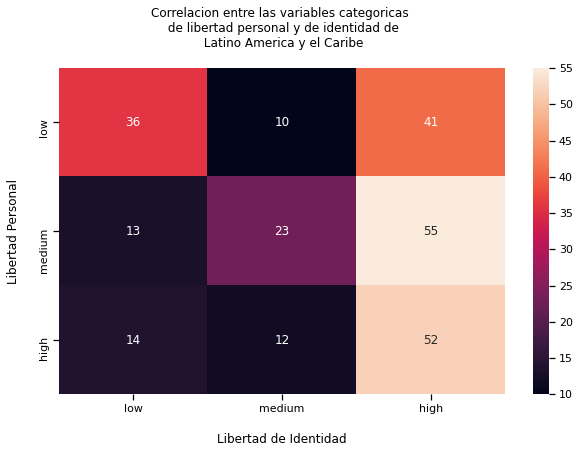

In [35]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(PFS_LA_segment, PFI_LA_segment)
display(exp)
seaborn.heatmap(exp, annot=True)
plt.ylabel('Libertad Personal\n')
plt.xlabel('\nLibertad de Identidad')
plt.title('Correlacion entre las variables categoricas \n de libertad personal y de identidad de\n Latino America y el Caribe\n')

En este grafico, para ambos casos "global" y "latinoamerica", si podemos observar cierta relacion entre las variables de libertad de identidad y libertad personal ya que los datos estan concentrados en las diagonales. Lo que sugiere que un valor alto de libertad de identidad conlleva a un valor alto de libertad personal (proporcionalidad directa)

ef_score,low,medium,high
pf_score,,,
low,286,166,48
medium,147,283,98
high,14,103,393


Text(0.5, 1.0, 'Correlacion entre las variables categoricas \n de libertad personal y economica globales\n')

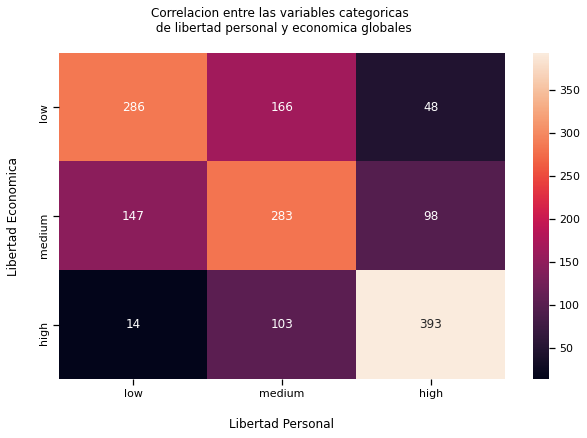

In [36]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(PFS_mundo_segment, EFS_mundo_segment)
display(exp)
seaborn.heatmap(exp, annot=True, fmt ='d')
plt.xlabel('\nLibertad Personal')
plt.ylabel('Libertad Economica\n')
plt.title('Correlacion entre las variables categoricas \n de libertad personal y economica globales\n')

ef_score,low,medium,high
pf_score,,,
low,26,45,16
medium,35,36,21
high,22,13,43


Text(0.5, 1.0, 'Correlacion entre las variables categoricas \n de libertad personal y economica de\n Latino America y el Caribe\n')

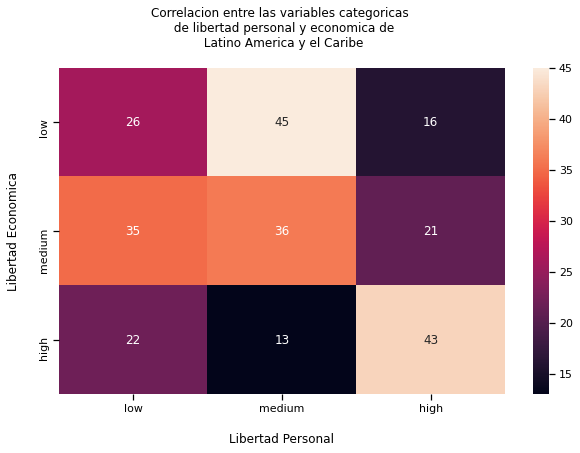

In [37]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(PFS_LA_segment, EFS_LA_segment)
display(exp)
seaborn.heatmap(exp, annot=True)
plt.xlabel('\nLibertad Personal')
plt.ylabel('Libertad Economica\n')
plt.title('Correlacion entre las variables categoricas \n de libertad personal y economica de\n Latino America y el Caribe\n')

En este ultimo grafico, se puede ver que hay pocos valores de intervalo alto de libertad personal para valores de intervalo bajo de libertad economica, y ademas hay concentracion de datos de intervalo alto en libertad personal correspondiente a intervalo tambien alto de libertad economica lo cual indicaria una cierta correlacion entre las variables. Sin embargo, no se puede apreciar claramente el tipo de dependencia.

# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

En el punto 3 de la primera parte, pudimos ver que visualmente la distribucion de la variable `pf_identity` pareceria aproximarse a una distribucion beta con asimetria negativa, la cual tendria una distribucion similar a: 

Text(0.5, 1.0, 'Beta distribution')

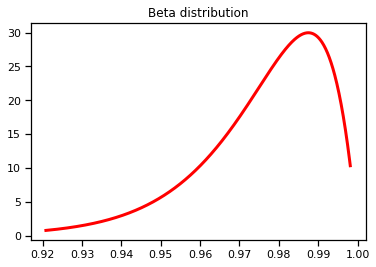

In [38]:
from scipy.stats import beta
fig, ax = plt.subplots(1, 1)
a, b = 80, 2
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = numpy.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 1000)
ax.plot(x, beta.pdf(x, a, b), 'r-', lw=3, alpha=1, label='beta pdf')
plt.title("Beta distribution")

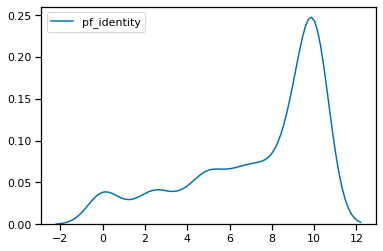

In [39]:
real = dataset.pf_identity.dropna()
seaborn.kdeplot(real)

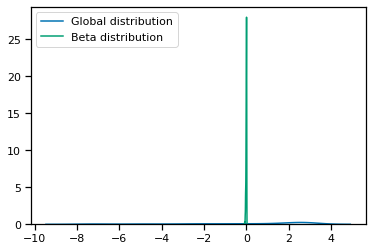

In [40]:
from scipy import stats

gl_dist = real.subtract(real.mean())
center_zero = lambda x: x-x.mean()

r = center_zero(stats.beta.rvs(a, b, size=1000))

seaborn.kdeplot(gl_dist, label="Global distribution")
seaborn.kdeplot(r, label="Beta distribution")

In [41]:
print(stats.kstest(gl_dist, 'beta', args=[a, b]))


KstestResult(statistic=0.538961038961039, pvalue=0.0)


Y para Latinoamérica:

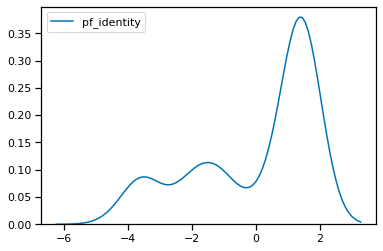

In [42]:
la_dist = dataset['Latin America & the Caribbean' == dataset['region']]['pf_identity'].dropna()
la_dist = la_dist.subtract(la_dist.mean()) 
seaborn.kdeplot(la_dist)

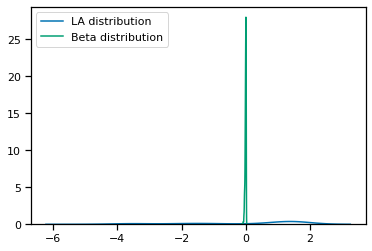

In [43]:
seaborn.kdeplot(la_dist, label="LA distribution")
seaborn.kdeplot(r, label="Beta distribution")

In [44]:
print(stats.kstest(la_dist, 'beta', args=[a, b]))


KstestResult(statistic=0.5736434108527132, pvalue=6.531278237901983e-81)


Veamos ahora la variable `hf_score`.

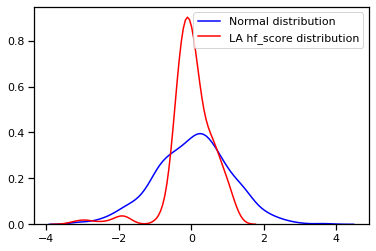

In [45]:
hf_score_la = dataset['Latin America & the Caribbean' == dataset['region']]['hf_score'].dropna()
hf_score_la = hf_score_la.subtract(hf_score_la.mean())
normal_dist = stats.norm.rvs(size=1000)

seaborn.kdeplot(normal_dist, label="Normal distribution", color="blue")
seaborn.kdeplot(hf_score_la, label="LA hf_score distribution", color="red")

In [46]:
stats.kstest(hf_score_la,'norm', args=(hf_score_la.mean(), hf_score_la.std()), N= hf_score_la.count())

KstestResult(statistic=0.1681239300384594, pvalue=7.63603351416207e-07)

La prueba K-S compara la distribucion acumulada de una distribución con otra y en terminos de escalas la distribución de `pf_identity` es muy diferente a la de la distribución beta. El valor que nos da la celda anterior podemos ver que el p-value es muy chico lo que quiere decir que es muy poco confiable decir
que las distribuciones son parecidas.

## 4. Correlaciones

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 

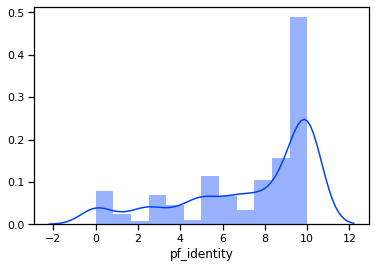

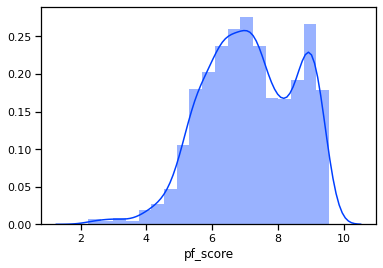

El coeficiente de Spearman para las variables pf_identity y ef_score es de 0.40077737030068


El coeficiente de Spearman para las variables pf_identity y pf_score es de 0.7313581415245098


In [47]:
#Estilo del grafico
seaborn.set_context("notebook")
style.use("seaborn-bright")

seaborn.distplot(dataset.pf_identity, label="pf_identity")
plt.show()
seaborn.distplot(dataset.pf_score, label="pf_identity")
plt.show()


#Spearman coef.
spearman_1=dataset.pf_identity.corr(dataset.ef_score, method="spearman")
print("El coeficiente de Spearman para las variables pf_identity y ef_score es de " + str(spearman_1))
print("\n")

spearman_2=dataset.pf_identity.corr(dataset.pf_score, method="spearman")
print("El coeficiente de Spearman para las variables pf_identity y pf_score es de " + str(spearman_2))

Optamos por utilizar el coeficiente de Spearman ya que el de Pearson es valido solo para distribuciones normales y ninguna de nuestras variables se pueden aproximar a una distribución normal. Ahora si podemos confirmar cuantitativamente que las variables personales (libertad personal y libertad de identidad) efectivamente están fuertemente relacionadas con proporcionalidad directa (coef = 0.7) mientras que las variables de identidad personal y libertad económica están débilmente relacionadas con proporcionalidad directa (coef = 0.4).

4. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

In [48]:
cols = ['pf_rank', 'ef_rank', 'hf_rank']
correl = dataset[cols]
correl.corr('kendall')

,pf_rank,ef_rank,hf_rank
pf_rank,1.000000,0.525190,0.815905
ef_rank,0.525190,1.000000,0.710294
hf_rank,0.815905,0.710294,1.000000


Decidimos trabajar sobre las variales de los rankings porque para poder usar la correlación de Kendall las mismas tienen que ser ordinales o de tipo ranking. Las variables mencionadas en el enunciado no pueden ser usadas dado que tienen valores continuos.

Los resultados obtenidos son coherentes teniendo en cuenta las visualizaciones que vimos anteriormente.